# Let's get started! ⚡

In [26]:
## IMPORT THE NECESSARY PYTHON LIBRARIES

# Exploratory Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.base import TransformerMixin

# Data Reading

In [27]:
# 데이터 읽어오기
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [28]:
# 헤드 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [30]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

## Exploratory Data Analysis 📊🤔

In [31]:
# 피처별로 학습데이터, 테스트데이터, 양쪽을 합친 총 생존자의 비율을 시각화해주는 함수
# plt, seaborn import하고, eda_bar_plots(컬럼명) 입력하시면 됩니다.
def eda_bar_plots(feature: str, target: str = 'Survived') -> None:
    """
    The given 'feature' is expected to be a categorical feature.
    Avoid calling this function with 'feature' == 'Age' or 'Fare'
    
    This function crates 3 bar plots to perform a visual
    Data Exploration analysis of the given 'feature'.
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    
    # (1) the distribution of 'feature' in the Training data
    df1 = df_train[feature].value_counts(normalize=True) 
    df1 = df1.sort_index().reset_index()
    # Now df1 has the columns: feature and 'proportion'
    sns.barplot(data=df1, x=feature, y='proportion', ax=ax1)
    # Set the title, the xlabel, and the ylabel.
    ax1.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Training Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax1.axhline(
        y=1/len(df1), color='green', alpha=0.4, linestyle='--'
    )
    
    # (2) the distribution of 'feature' in the Test data
    df2 = df_test[feature].value_counts(normalize=True) 
    df2 = df2.sort_index().reset_index()
    # Now df2 has the columns: feature and 'proportion'
    sns.barplot(data=df2, x=feature, y='proportion', ax=ax2)
    # Set the title, the xlabel, and the ylabel.
    ax2.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Test Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax2.axhline(
        y=1/len(df2), color='green', alpha=0.4, linestyle='--'
    )
    
    # (3) the relationship between the 'target' and the 
    # categories of 'feature' in the training data
    df3 = df_train.groupby(feature, as_index=False).agg(
        {target: 'mean'}
    ).sort_values(by=feature)
    sns.barplot(x=feature, y=target, data=df3, ax=ax3)
    ax3.set(
        xlabel=feature,
        ylabel=f'% {target}', 
        title=f"{feature}: prob of '{target}'"
    )
    # Plot a horizontal line at the baseline prediction
    # probability: two classes -> prob=0.5
    ax3.axhline(
        y=0.5, color='green', alpha=0.4, linestyle='--'
    )

In [32]:
df_train['Family'] = df_train['SibSp'].astype(int) + df_train['Parch'].astype(int) + 1
df_test['Family'] = df_test['SibSp'].astype(int) + df_test['Parch'].astype(int) + 1

In [33]:
# 'avg_Fare_by_50' 컬럼 생성 함수
def make_avg_Fare_by_50(df_train, df_test):
    df_train['avg_Fare_by_50'] = round(df_train['Fare'] / (df_train['Family'] * 50) + 1.0e-10)
    df_test['avg_Fare_by_50'] = round(df_test['Fare'] / (df_test['Family'] * 50) + 1.0e-10)
    
    return df_train, df_test

In [34]:
# 'avg_Fare_by_50' 레이블 인코딩 함수
def label_encoding_avg_Fare(df_train, df_test):
    def categorize_avg_Fare(x):
        if x == 0:
            return 'Cheap'
        else:
            return 'Expensive'

    df_train['avg_Fare_by_50'] = df_train['avg_Fare_by_50'].map(categorize_avg_Fare)
    df_test['avg_Fare_by_50'] = df_test['avg_Fare_by_50'].map(categorize_avg_Fare)
    
    return df_train, df_test

In [35]:
df_train, df_test = make_avg_Fare_by_50(df_train, df_test)
df_train, df_test = label_encoding_avg_Fare(df_train, df_test)

In [36]:
eda_bar_plots('avg_Fare_by_50')

<Axes: xlabel='avg_Fare', ylabel='Pclass'>

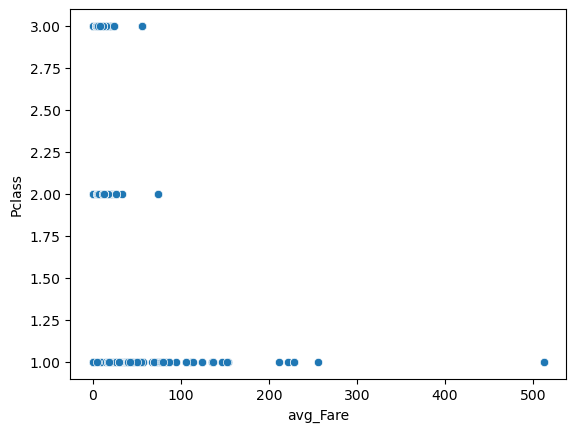

In [40]:
df_train['avg_Fare'] = round(df_train['Fare'] / df_train['Family'] + 1.0e-10)

sns.scatterplot(
      data=df_train
    , x='avg_Fare'
    , y='Pclass'
)

In [38]:
# 피어슨 계수 행렬 시각화

# corr_matrix = pd.get_dummies(df_train).corr(method='pearson')

# plt.figure(figsize=(10, 8))
# sns.heatmap(
#     corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
# )
# plt.title("Pearson Correlation Heatmap")
# plt.show()